# Estimate mortality per age

## Elevator pitch

Italian estimates say that fatality rate is 32 times higher for an 80 year old, then for a 40 year old. If we account for age distribution of the Italian population the ratio would be 136 (with this method of estimation).

## Summary

Italian estimate for fatality rate is: 
```
0      0.1
10     0.0
20     0.1
30     0.3
40     0.9
50     2.6
60    10.0
70    24.5
80    29.5
90    25.5
```

[Source](http://www.coronaviruscovid19.it/) under "Il tasso di letalità per fasce di età"

The way this is estimated (I assume) is that they divided deaths with documented positive cases.

The problem with this method is that in different age group the ratio of documented vs true cases can be different. E.g. Maybe there are more asymptomatic young people then old.

Here I estimate fatality rate

* assuming even distribution of infected people across cases
* taking into account distribution of deaths by age.
* taking account population distribution by age.

In this way we can get a feeling of how much more dangerous this is for old people then young.

```
0      0.002476
10     0.000000
20     0.009631
30     0.044630
40     0.163161
50     0.742308
60     2.697328
70     9.130219
80    22.259520
90    41.58394
```

**Note that the above numbers are multiplied to get an average fatality rate of 3%. If you assume 0.3% to devide all nubmers by 10.**

The point is the ratio between the ages.

# Calculation comes from here...

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

mpl.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 7]

In [2]:
import datetime
from dateutil.parser import parse as parse_date

# Italy death distribution
Italy had 26892 deaths by 2020/05/04

They puplished the share of deaths and fatality rate estimates per age.

Source [coronaviruscovid19.it](http://www.coronaviruscovid19.it/) under "Il tasso di letalità per fasce di età"

### Italy covid death distribution per age

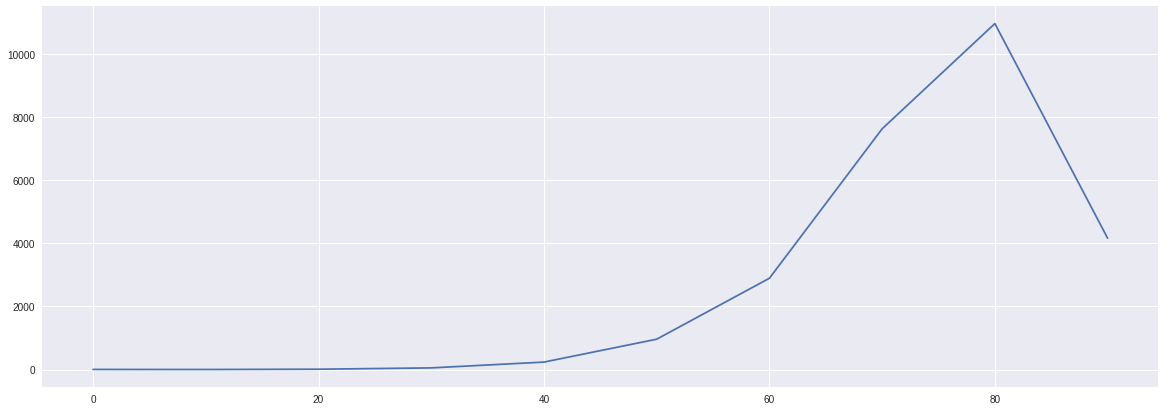

In [3]:
covid_deaths = pd.Series({0:2, 10:0, 20:9, 30:51, 40:235, 50:960, 60:2891, 70:7625,80:10959, 90:4160})
covid_deaths.plot()

In [4]:
covid_deaths.sum()

26892

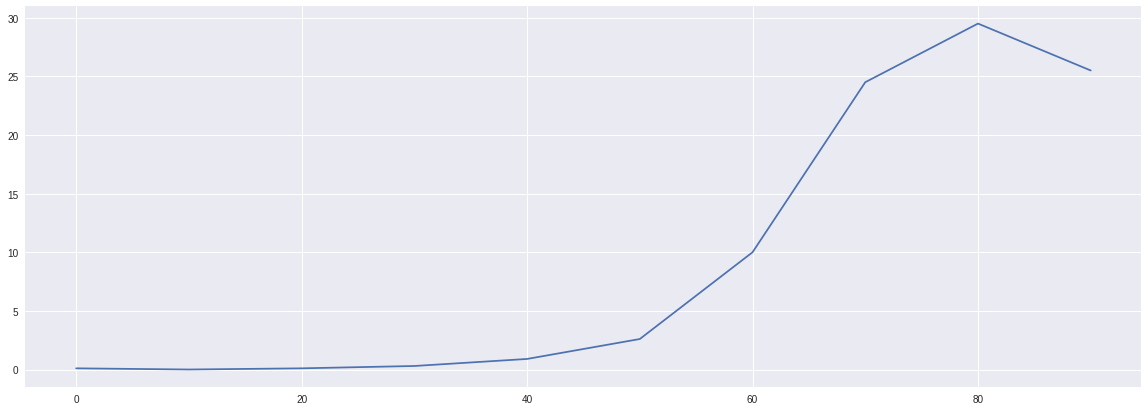

In [5]:
official_estimate = pd.Series({0:0.1/100, 10: 0, 20: 0.1/100, 30: 0.3/100, 40: 0.9/100, 50:2.6/100, 60:10/100, 70: 24.5/100, 80:29.5/100, 90:25.5/100})
(100*official_estimate).plot()

In [6]:
100*official_estimate

0      0.1
10     0.0
20     0.1
30     0.3
40     0.9
50     2.6
60    10.0
70    24.5
80    29.5
90    25.5
dtype: float64

# WHO population data
https://www.who.int/healthinfo/statistics/mortality_rawdata/en/

In [7]:
country_codes = pd.read_csv('pop/who-country_codes')
country_codes

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso
...,...,...
222,5197,Samoa
223,5198,Solomon Islands
224,5200,Tonga
225,5205,Tuvalu


In [8]:
italy_code = country_codes[country_codes.name == 'Italy'].country.iloc[0]
italy_code

4180

In [9]:
pop = pd.read_csv('pop/who-pop')
pop

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,5195,NaN,NaN,1977,2,4,1358000.0,53400.0,192200.0,NaN,...,28400.0,22000.0,15700.0,15600.0,NaN,NaN,NaN,NaN,0.0,60000.0
9431,5195,NaN,NaN,1980,1,3,1575700.0,53400.0,47400.0,48900.0,...,34100.0,14600.0,7500.0,3300.0,NaN,NaN,NaN,NaN,0.0,65000.0
9432,5195,NaN,NaN,1980,2,3,1435000.0,49300.0,43200.0,44700.0,...,29400.0,12600.0,5800.0,2900.0,NaN,NaN,NaN,NaN,0.0,62000.0
9433,5200,NaN,NaN,2003,1,4,51711.0,1156.0,5045.0,NaN,...,1390.0,1193.0,859.0,952.0,NaN,NaN,NaN,NaN,0.0,1433.0


### Latest year is 2015 unfortunately 

In [10]:
pop[(pop.Country == italy_code) & (pop.Year==2015)]

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
6251,4180,NaN,NaN,2015,1,0,29478956.0,250929.0,260030.0,269129.0,...,1751840.0,1728204.0,1345477.0,1210901.0,820615.0,437738.0,152641.0,24692.0,0.0,243481.0
6252,4180,NaN,NaN,2015,2,0,31251626.0,237191.0,246207.0,254604.0,...,1886408.0,1894941.0,1563774.0,1537866.0,1230159.0,846987.0,406051.0,94372.0,0.0,229980.0


### add male and female

In [11]:
it_all = pop[(pop.Country == italy_code) & (pop.Year==2015)].sum()
it_all

Country        8360.0
Admin1            0.0
SubDiv            0.0
Year           4030.0
Sex               3.0
Frmat             0.0
Pop1       60730582.0
Pop2         488120.0
Pop3         506237.0
Pop4         523733.0
Pop5         540900.0
Pop6         553908.0
Pop7        2860437.0
Pop8        2859159.0
Pop9        2872743.0
Pop10       3059411.0
Pop11       3271559.0
Pop12       3574859.0
Pop13       4167140.0
Pop14       4806160.0
Pop15       4951769.0
Pop16       4701742.0
Pop17       4060052.0
Pop18       3638248.0
Pop19       3623145.0
Pop20       2909251.0
Pop21       2748767.0
Pop22       2050774.0
Pop23       1284725.0
Pop24        558692.0
Pop25        119064.0
Pop26             0.0
Lb           473461.0
dtype: float64

### columns pop2..pop25 is the population per ages

Documentation: 
https://www.who.int/healthinfo/statistics/mortality_rawdata/en/

In [12]:
it_per_age = it_all.drop(['Country', 'Admin1', 'SubDiv', 'Year', 'Sex', 'Frmat', 'Pop1', 'Pop26', 'Lb'])
it_per_age

Pop2      488120.0
Pop3      506237.0
Pop4      523733.0
Pop5      540900.0
Pop6      553908.0
Pop7     2860437.0
Pop8     2859159.0
Pop9     2872743.0
Pop10    3059411.0
Pop11    3271559.0
Pop12    3574859.0
Pop13    4167140.0
Pop14    4806160.0
Pop15    4951769.0
Pop16    4701742.0
Pop17    4060052.0
Pop18    3638248.0
Pop19    3623145.0
Pop20    2909251.0
Pop21    2748767.0
Pop22    2050774.0
Pop23    1284725.0
Pop24     558692.0
Pop25     119064.0
dtype: float64

In [13]:
it_nums = it_per_age.rename({'Pop' + str(i+2): j for i, j in enumerate([0,1,2,3,4] + [i*5 for i in range(1, 20)])})
it_nums

0      488120.0
1      506237.0
2      523733.0
3      540900.0
4      553908.0
5     2860437.0
10    2859159.0
15    2872743.0
20    3059411.0
25    3271559.0
30    3574859.0
35    4167140.0
40    4806160.0
45    4951769.0
50    4701742.0
55    4060052.0
60    3638248.0
65    3623145.0
70    2909251.0
75    2748767.0
80    2050774.0
85    1284725.0
90     558692.0
95     119064.0
dtype: float64

In [14]:
it_first5 = it_nums[list(range(5))].sum()
it_first5

2612898.0

In [15]:
it_age5 = it_nums.drop(list(range(5)))
it_age5

5     2860437.0
10    2859159.0
15    2872743.0
20    3059411.0
25    3271559.0
30    3574859.0
35    4167140.0
40    4806160.0
45    4951769.0
50    4701742.0
55    4060052.0
60    3638248.0
65    3623145.0
70    2909251.0
75    2748767.0
80    2050774.0
85    1284725.0
90     558692.0
95     119064.0
dtype: float64

In [16]:
it_age5[0] = it_first5

In [17]:
it_age5.sort_index(inplace=True)

In [18]:
it_age5

0     2612898.0
5     2860437.0
10    2859159.0
15    2872743.0
20    3059411.0
25    3271559.0
30    3574859.0
35    4167140.0
40    4806160.0
45    4951769.0
50    4701742.0
55    4060052.0
60    3638248.0
65    3623145.0
70    2909251.0
75    2748767.0
80    2050774.0
85    1284725.0
90     558692.0
95     119064.0
dtype: float64

## age distribution of population
(in 2015)

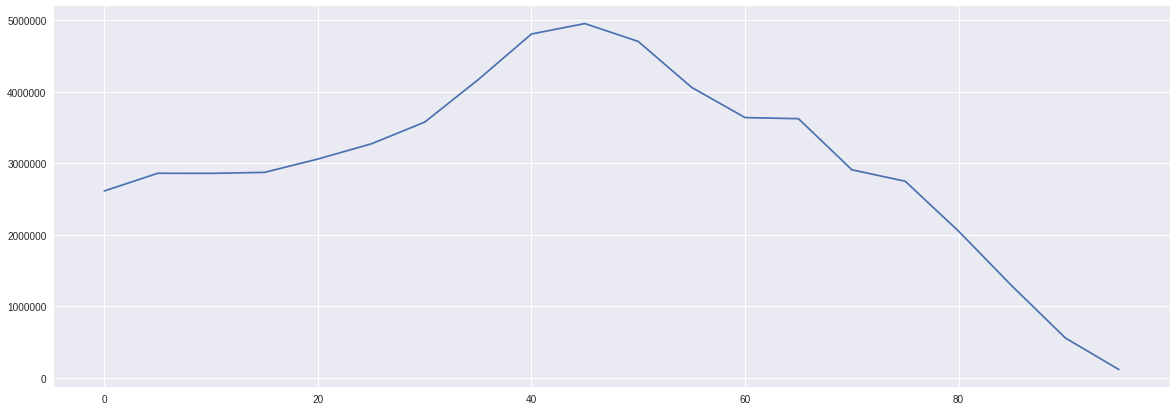

In [19]:
ax = it_age5.plot()
ax.ticklabel_format(style='plain')

## covid deaths distribution

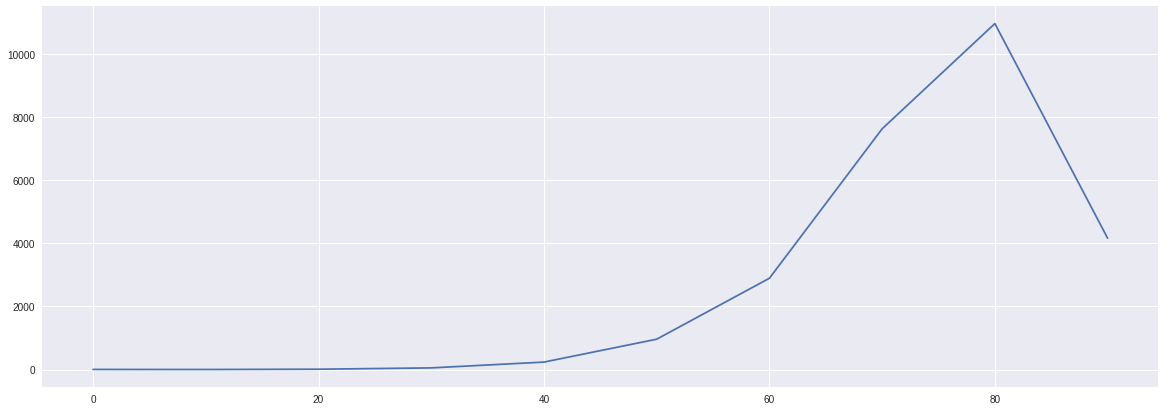

In [20]:
covid_deaths.plot()

### bucket population data in years of 10 instead of 5

In [21]:
pop10 = it_age5.groupby(lambda x: int((x)/10)*10).sum()
pop10

0     5473335.0
10    5731902.0
20    6330970.0
30    7741999.0
40    9757929.0
50    8761794.0
60    7261393.0
70    5658018.0
80    3335499.0
90     677756.0
dtype: float64

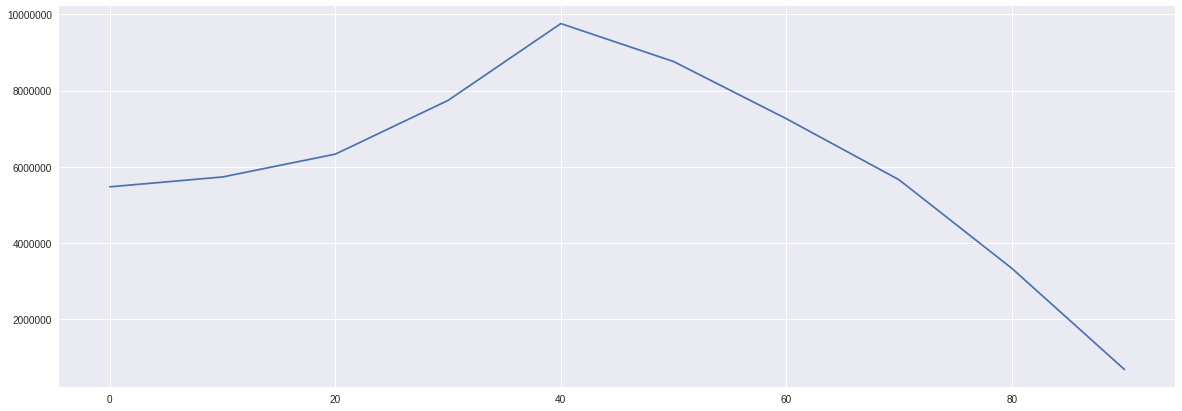

In [22]:
ax = pop10.plot()
ax.ticklabel_format(style='plain')

## Observation: 0.04% of population already died

In [23]:
100 * covid_deaths.sum() / pop10.sum()

0.04428081101461298

### To get some prevalence of the disase let's assume an average death rate of 3%

In [24]:
assumed_average_death_rate = 0.03

In [25]:
prevalence = covid_deaths.sum() / (pop10.sum() * assumed_average_death_rate)
prevalence

0.014760270338204328

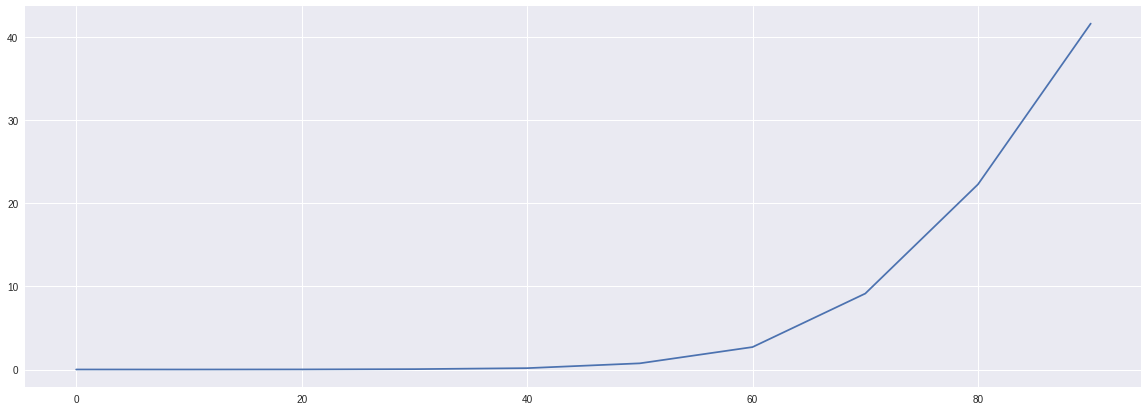

In [26]:
death_rate_estimate = covid_deaths / (pop10*prevalence)
(100 * death_rate_estimate).plot()

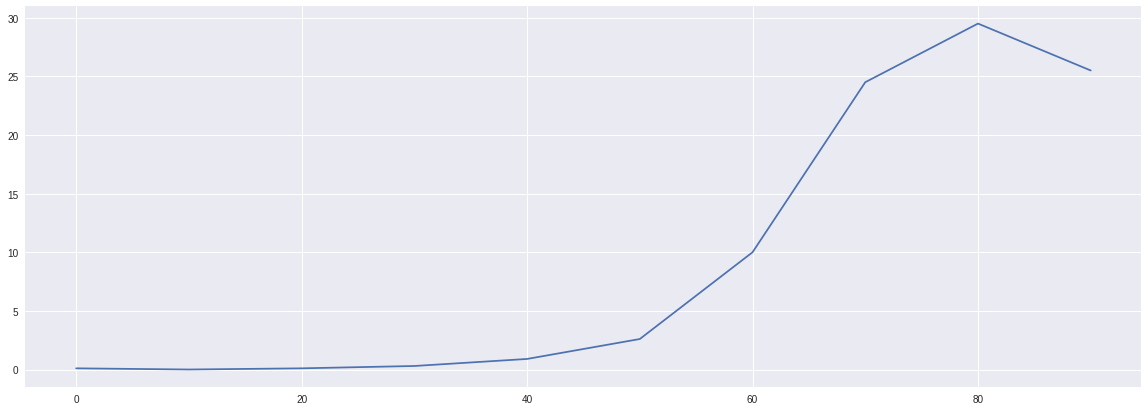

In [27]:
(100*official_estimate).plot()

In [28]:
(100 * death_rate_estimate)

0      0.002476
10     0.000000
20     0.009631
30     0.044630
40     0.163161
50     0.742308
60     2.697328
70     9.130219
80    22.259520
90    41.583941
dtype: float64

In [29]:
(100 * official_estimate)

0      0.1
10     0.0
20     0.1
30     0.3
40     0.9
50     2.6
60    10.0
70    24.5
80    29.5
90    25.5
dtype: float64

# Compare risk by age 40 vs 70
55 times more likely to die. (Official estimate 27)

In [30]:
official_estimate[70] / official_estimate[40]

27.222222222222218

In [31]:
death_rate_estimate[70] / death_rate_estimate[40]

55.95840340617584

# Compare risk by age 40 vs 80
136 times more likely to die. (Official estimate 32)

In [32]:
official_estimate[80] / official_estimate[40]

32.77777777777777

In [33]:
death_rate_estimate[80] / death_rate_estimate[40]

136.42686633005175